# Project Submission by Joe Janko

Thank you for taking the time to review my work. I appreciate your time and consideration and look forward for the opportunity to possibly work for Macro Risk Advisors. If you have any questions about this writeup, please do not hesitate to contact me at (312) 661-6301 or joseph.janko@outlook.com. I look forward to hearing back from you!

## Objective

Create 1-2 functions in a programming language of your choosing (preferably Python) that calculates the implied and realized correlation for a given index/ETF and corresponding weightings and volatilities. 
Implied/realized correlation is generally calculated as such:

![Implied Correlation Calculation](https://investingwithoptions.com/wp-content/uploads/correlation_calculation.png)

![Implied Correlation Calculation](http://www.bsic.it/wp-content/uploads/2017/11/word-image-3.png)


The functions should then be applied to the full time series of data and both the implied & realized correlation outputs should be plotted for the full time series within the coding environment using a charting module of your choice (e.g. matplotlib, seaborn, plotly, etc.).


## Asumptions

All data analytics and modeling should be performed in a programming language of your choosing (Python, R, etc.) but Python is strongly preferred. Note that you only need to create 1-2 functions and all other ‘helper’ functions can and should be imported as separate modules for your use (as needed, of course) within your custom function(s) (e.g. Pandas, Itertools, etc.)

## Code

## Helper Functions

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

#calculate the denominator for the impled/realized correlation equation
def calcDenominator(ETF, columnName, i):
    denominator = 0.0
    for x in ETF[ETF.Date == i[1][0]]['Ticker'].unique():
        denominator = denominator + (ETF[ETF.Date == i[1][0]][ETF[ETF.Date == i[1][0]]['Ticker'] != x]['Weight'] * ETF[ETF.Date == i[1][0]][ETF[ETF.Date == i[1][0]]['Ticker'] == x]['Weight'].values[0] * ETF[ETF.Date == i[1][0]][ETF[ETF.Date == i[1][0]]['Ticker'] != x][columnName] * ETF[ETF.Date == i[1][0]][ETF[ETF.Date == i[1][0]]['Ticker'] == x][columnName].values[0]).sum()
    return denominator
    

def getImpliedCorr(ETF, Index_Data):
    
    for i in Index_Data.iterrows():
    
        
        denominator = calcDenominator(ETF, '3M RV',i)
        denominator2 = calcDenominator(ETF, '3M ATM IV',i)
        #calculate the implied correlation
        Index_Data.loc[Index_Data.index == i[0], 'Realized Corr']=100.0*(Index_Data.loc[Index_Data.index == i[0],'3M RV'].values[0]**2 - \
                      (ETF[ETF.Date == i[1][0]]['3M RV']**2*ETF[ETF.Date == i[1][0]]['Weight']**2).sum()) / (denominator ) 
        Index_Data.loc[Index_Data.index == i[0], 'Implied Corr'] = 100.0 * (Index_Data.loc[Index_Data.index == i[0], '3M ATM IV'].values[0]**2 \
                      - (ETF[ETF.Date == i[1][0]]['3M ATM IV']**2 * ETF[ETF.Date == i[1][0]]['Weight']**2).sum()) / (denominator2 )
    return Index_Data
    


## Preprocess Data

In [91]:
#read the data into the dataframe
#data = pd.read_excel(r'C:\Users\jjanko\Desktop\test_sample.xlsx')
data = pd.read_excel(r'C:\Users\jjanko\Desktop\MRA Implied Correlation Index Data.xlsx')

#scale volatility by 100 for easier reading
data.loc[:,'3M ATM IV'] = data.loc[:,'3M ATM IV'] * 100.0
data.loc[:,'3M RV'] = data.loc[:,'3M RV'] * 100.0

#separate the index data from the underlying components
Index_Data = data.loc[data['Type'] == 'Index']
#separate the underlying components away from dataset
ETF = data.loc[data['Type'] != 'Index']

#add columns for implied and realized correlation for given index/ETF
Index_Data.loc[:,'Realized Corr'] = 0.0
Index_Data.loc[:,'Implied Corr'] = 0.0

## Get Results

In [92]:
Index_Data = getImpliedCorr(ETF, Index_Data)

## Output

In [93]:
Index_Data = Index_Data.set_index('Date')
print(Index_Data)

             Type Ticker Weight  3M ATM IV  3M RV  Realized Corr  Implied Corr
Date                                                                          
2019-10-16  Index    SPX      -    13.9021  17.10      45.585917     37.075155
2019-10-15  Index    SPX      -    13.8701  17.13      45.458104     36.467845
2019-10-14  Index    SPX      -    14.6570  17.06      45.851504     38.245099
2019-10-11  Index    SPX      -    15.1074  17.07      45.474017     39.518295
2019-10-10  Index    SPX      -    16.3462  16.95      45.034086     43.170387
2019-10-09  Index    SPX      -    17.0190  16.91      44.414656     45.505492
2019-10-08  Index    SPX      -    18.0837  16.84      44.181072     48.373513
2019-10-07  Index    SPX      -    16.4004  16.54      42.879858     44.368516
2019-10-04  Index    SPX      -    15.9597  16.52      42.840381     41.919618
2019-10-03  Index    SPX      -    17.5886  16.27      41.861626     45.497605
2019-10-02  Index    SPX      -    18.6180  16.18   

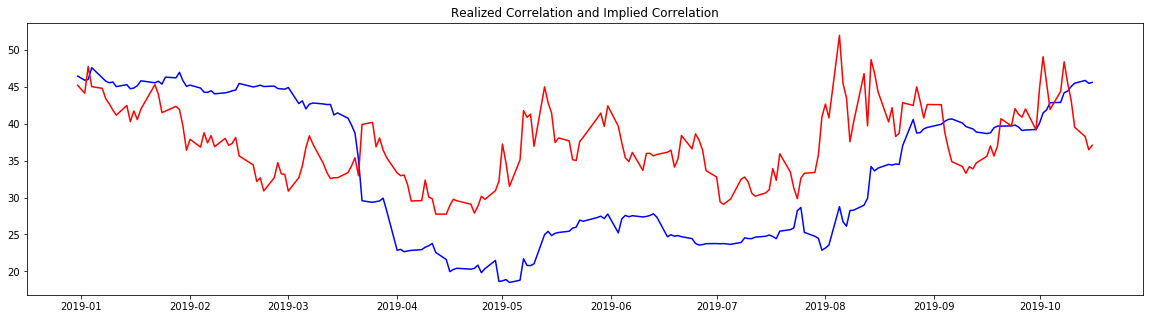

Note: Realized correlation is blue and implied correlation is red


In [94]:

plt.plot(Index_Data.index, Index_Data['Realized Corr'], 'b')
plt.plot(Index_Data.index, Index_Data['Implied Corr'], 'r')
plt.title('Realized Correlation and Implied Correlation')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()
print("Note: Realized correlation is blue and implied correlation is red")

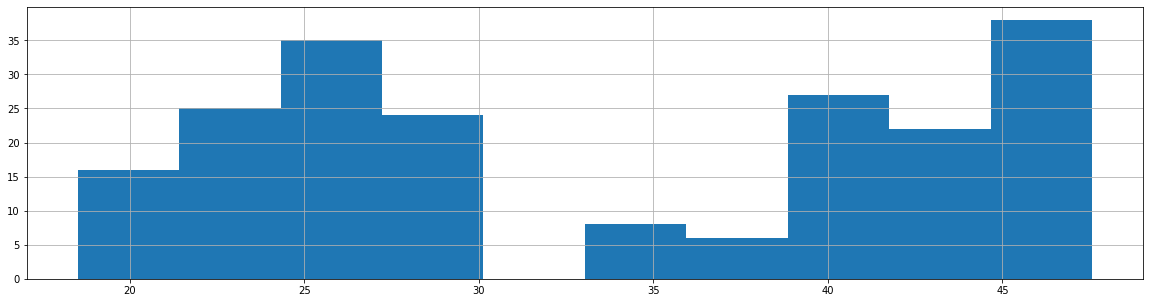

In [95]:
Index_Data['Realized Corr'].hist()

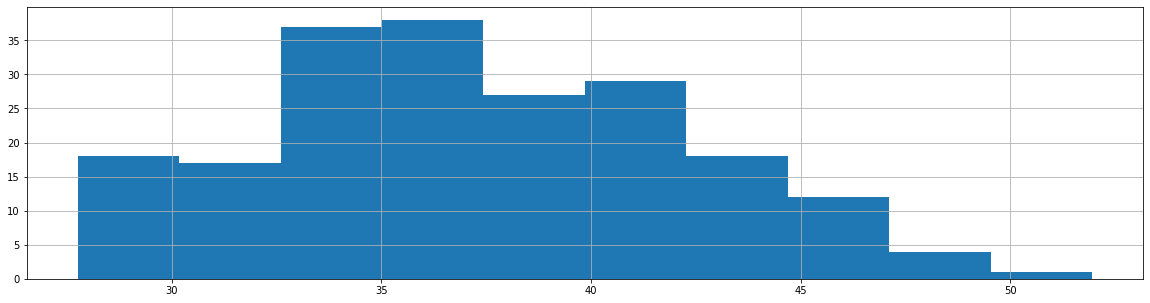

In [96]:
Index_Data['Implied Corr'].hist()

Note: Realized correlation is blue and implied correlation is red


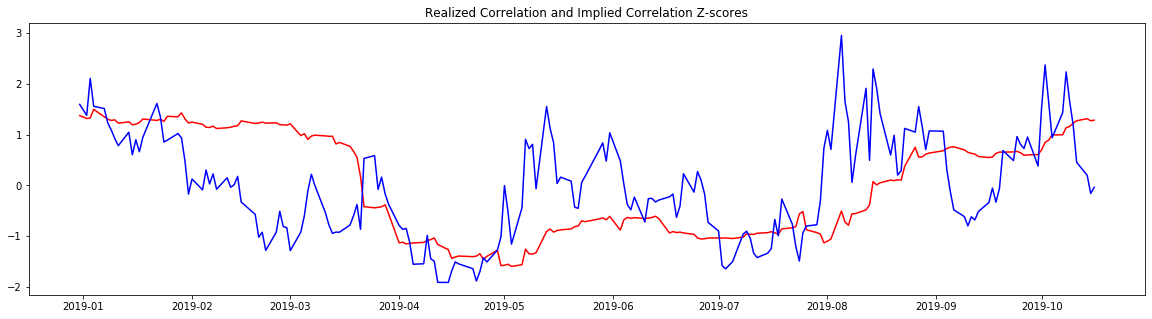

In [97]:
z_realized = (Index_Data['Realized Corr'] - Index_Data['Realized Corr'].mean()) /  Index_Data['Realized Corr'].std()
z_implied = (Index_Data['Implied Corr'] - Index_Data['Implied Corr'].mean()) /  Index_Data['Implied Corr'].std()
plt.plot(Index_Data.index, z_realized, 'r')
plt.plot(Index_Data.index, z_implied, 'b')
plt.title('Realized Correlation and Implied Correlation Z-scores')
print("Note: Realized correlation is blue and implied correlation is red")

## Model Validation

Run the above functions on the test set given in the reference at the bottom of the page validate if above model is correct

In [98]:
#read the data into the dataframe
data = pd.read_excel(r'C:\Users\jjanko\Desktop\test_sample.xlsx')

#scale volatility by 100 for easier reading
data.loc[:,'3M ATM IV'] = data.loc[:,'3M ATM IV'] * 100.0
data.loc[:,'3M RV'] = data.loc[:,'3M RV'] * 100.0

#separate the index data from the underlying components
Index_Data = data.loc[data['Type'] == 'Index']
#separate the underlying components away from dataset
ETF = data.loc[data['Type'] != 'Index']

#add columns for implied and realized correlation for given index/ETF
Index_Data.loc[:,'Realized Corr'] = 0.0
Index_Data.loc[:,'Implied Corr'] = 0.0
Index_Data = getImpliedCorr(ETF, Index_Data)
print(Index_Data)

        Date   Type Ticker Weight  3M ATM IV  3M RV  Realized Corr  \
0 2019-05-29  Index    SPX      -      28.17  28.17      59.459223   

   Implied Corr  
0     59.459223  


The implied correlation calculation matches the results in the reference.

I spent about 10 minutes creating the code for this project.

## References

http://www.cboe.com/micro/impliedcorrelation/impliedcorrelationindicator.pdf <br>
http://www.bsic.it/lost-dispersion-trading/